In [158]:
import os
import numpy as np 
import dataset_flickr
import importlib


In [159]:
%run dataset_flickr

In [160]:
ann_dir = "/home/Datasets/flickr30k/annotations/"
ann_fname = "results.csv"
src_img_dir =  "/home/Datasets/flickr30k/flickr30k_images"
dst_img_dir =  "/home/Datasets/flickr30k/images_split"
NUM_OF_IMG = 1000

In [161]:
importlib.reload(dataset_flickr)

<module 'dataset_flickr' from '/home/INM706/INM706_CW/dataset_flickr.py'>

In [162]:
data_args = {'stage': 'test',
            'ds_path' : "/home/Datasets/flickr30k/", 
            'captions_dir': "annotations",
            'captions_fname': 'results_new.csv',
            'images_dir': 'images_split'}
val_data = dataset_flickr.Flickr30kData(**data_args)

stage:  test
ds_path:  /home/Datasets/flickr30k/
captions_f:  /home/Datasets/flickr30k/annotations/results_new.csv
imgs_dir:  /home/Datasets/flickr30k/images_split/test


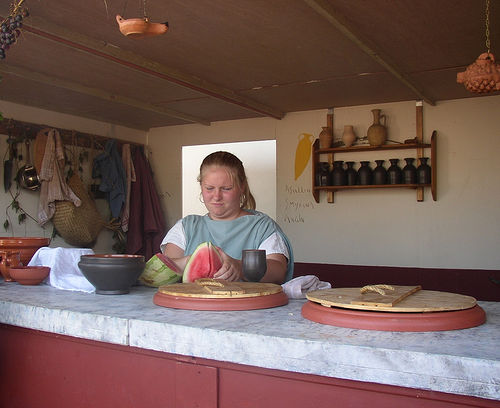

In [163]:
val_data.plot_img(20)

In [164]:
cap = val_data.get_image_caption(20)
cap 

[' Blond-haired woman pulling apart a watermelon , sitting atop a marble table .',
 ' A female with blond-hair is cutting a watermelon on a marble countertop .',
 ' A woman in a light blue shirt with white sleeves cuts a watermelon .',
 ' Waitress working in a restaurant cutting watermelon .',
 ' A female cutting into a watermelon .']

In [165]:
#pip install transformers

In [166]:
import transformers
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased",do_lower_case=True)
encoded_inputs = tokenizer(cap,
                                   return_token_type_ids = False, 
                                   return_attention_mask = False, 
                                   max_length = 20, 
                                   padding = "max_length",
                                  return_tensors = "pt")
encoded_inputs

{'input_ids': tensor([[  101,  8855,  1011, 10681,  2450,  4815,  4237,  1037,  2300, 10199,
          2239,  1010,  3564, 10234,  1037,  7720,  2795,  1012,   102,     0],
        [  101,  1037,  2931,  2007,  8855,  1011,  2606,  2003,  6276,  1037,
          2300, 10199,  2239,  2006,  1037,  7720,  4675, 14399,  1012,   102],
        [  101,  1037,  2450,  1999,  1037,  2422,  2630,  3797,  2007,  2317,
         15114,  7659,  1037,  2300, 10199,  2239,  1012,   102,     0,     0],
        [  101, 13877,  2551,  1999,  1037,  4825,  6276,  2300, 10199,  2239,
          1012,   102,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  1037,  2931,  6276,  2046,  1037,  2300, 10199,  2239,  1012,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0]])}

In [167]:
val_data.load_img(20)

tensor([[[0.3137, 0.3137, 0.3137,  ..., 0.2000, 0.2000, 0.1961],
         [0.3020, 0.3020, 0.3059,  ..., 0.2118, 0.2078, 0.2078],
         [0.2980, 0.2980, 0.3020,  ..., 0.2039, 0.2039, 0.2000],
         ...,
         [0.2078, 0.2157, 0.2196,  ..., 0.3569, 0.3569, 0.3608],
         [0.2039, 0.2118, 0.2196,  ..., 0.3843, 0.3922, 0.3961],
         [0.2039, 0.2118, 0.2157,  ..., 0.3922, 0.3843, 0.3804]],

        [[0.2314, 0.2314, 0.2314,  ..., 0.1255, 0.1255, 0.1216],
         [0.2196, 0.2196, 0.2235,  ..., 0.1373, 0.1333, 0.1333],
         [0.2235, 0.2235, 0.2275,  ..., 0.1294, 0.1294, 0.1255],
         ...,
         [0.0549, 0.0549, 0.0588,  ..., 0.1569, 0.1569, 0.1608],
         [0.0510, 0.0510, 0.0588,  ..., 0.1686, 0.1765, 0.1804],
         [0.0510, 0.0510, 0.0549,  ..., 0.1608, 0.1529, 0.1490]],

        [[0.2118, 0.2118, 0.2118,  ..., 0.0706, 0.0706, 0.0667],
         [0.2000, 0.2000, 0.2039,  ..., 0.0824, 0.0784, 0.0784],
         [0.2000, 0.2000, 0.2039,  ..., 0.0745, 0.0745, 0.

In [168]:
X, y = val_data[22]
print(X)
print(y) 

tensor([[[0.2392, 0.2078, 0.2235,  ..., 0.4510, 0.5451, 0.4980],
         [0.2078, 0.2235, 0.1922,  ..., 0.5451, 0.6039, 0.4392],
         [0.2235, 0.2431, 0.2196,  ..., 0.5333, 0.6000, 0.6157],
         ...,
         [0.6235, 0.6118, 0.6078,  ..., 0.6431, 0.6706, 0.6863],
         [0.5882, 0.6000, 0.6039,  ..., 0.7255, 0.6745, 0.6863],
         [0.6000, 0.6039, 0.6039,  ..., 0.6902, 0.6824, 0.6706]],

        [[0.2784, 0.2471, 0.2745,  ..., 0.4471, 0.5490, 0.5020],
         [0.2471, 0.2627, 0.2353,  ..., 0.5882, 0.6471, 0.4745],
         [0.2745, 0.2824, 0.2549,  ..., 0.5294, 0.6000, 0.6235],
         ...,
         [0.6745, 0.6627, 0.6471,  ..., 0.6196, 0.7294, 0.7216],
         [0.6392, 0.6510, 0.6431,  ..., 0.7451, 0.7294, 0.7137],
         [0.6510, 0.6431, 0.6353,  ..., 0.7451, 0.7176, 0.7098]],

        [[0.3255, 0.2863, 0.3059,  ..., 0.4784, 0.4784, 0.4314],
         [0.2863, 0.2980, 0.2588,  ..., 0.5725, 0.5843, 0.3608],
         [0.3098, 0.3176, 0.2824,  ..., 0.5529, 0.5529, 0.

In [169]:
ann_dir = "/home/Datasets/flickr30k/annotations/"
ann_fname = "results_new.csv"
src_img_dir =  "/home/Datasets/flickr30k/flickr30k_images"
dst_img_dir =  "/home/Datasets/flickr30k/images_split"
NUM_OF_IMG = 1000

In [170]:
fpath = ann_dir + ann_fname
col_names = ["img_name", "comment_number", "comment"]
df = pd.read_csv(fpath, delimiter = "|", names=col_names, header=None, skiprows = 1)
df.head()

,img_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [171]:
#df['comment'].str.len()
#count = df['comment'].str.split(' ').apply(len).value_counts()
count = df['comment'].str.count(' ').add(1).value_counts(sort=False)
#count.index = count.index.astype('str') + ' words:'
print(count)
#count.index#.astype('str')
#str(count)
#a = list(count.index)#.sort()
#a.sort()
#a[-1]

18     6627
12    15429
8      7894
13    14480
11    14820
      ...  
72        1
70        2
74        1
66        1
61        2
Name: comment, Length: 75, dtype: int64


In [172]:
q = pd.DataFrame( data = list(count.index), columns = ['word_count'] )
q['count'] =  list(count)
q.describe()


,word_count,count
count,75.000000,75.000000
mean,40.146667,2118.866667
std,22.057476,4176.882487
min,3.000000,1.000000
25%,21.500000,4.500000
50%,40.000000,54.000000
75%,58.500000,1279.000000
max,83.000000,15429.000000


In [174]:
df = df.pivot(index='img_name', columns='comment_number', values='comment') #.drop(columns = ['comment_number'], inplace = True)
df = df.reset_index()

In [175]:
list(df[df.img_name == "12736326.jpg"].values[0][1:])

[' Blond-haired woman pulling apart a watermelon , sitting atop a marble table .',
 ' A female with blond-hair is cutting a watermelon on a marble countertop .',
 ' A woman in a light blue shirt with white sleeves cuts a watermelon .',
 ' Waitress working in a restaurant cutting watermelon .',
 ' A female cutting into a watermelon .']

In [176]:
p = "/home/Datasets/flickr30k/images_split/val"
files = os.listdir(p)
df[df.img_name.isin(files)]


comment_number,img_name,0,1,2,3,4
700,1235681222.jpg,A person in a blue shirt sits behind two peop...,Three people sit on wood benches set on white...,People sitting on benches in a public area .,Three people sit waiting in a lobby .,People sit on benches .
701,1235685934.jpg,A man wearing sunglasses is standing next to ...,"There are two men with sunglasses , one of wh...",A man looking at the camera with another man ...,The man is wearing a white shirt and sunglass...,A man in sunglasses on an overpass .
702,123628218.jpg,"Three people , one with a black shirt , one w...",A group of three individuals are working in a...,Three people are working on computers in a cr...,Three people working together in a compact sp...,People working on their computers and papers .
703,1236951314.jpg,A swimming person is watching a child jump in...,A young boy jumps in a swimming pool towards ...,A child is jumping into a pool while a man is...,A boy with goggles jumping into a pool contai...,A boy in a wetsuit jumps into a pool with a b...
704,1236964638.jpg,"Child flips off pool diving board , man and a...",A child jumping into a swimming pool from the...,A boy is diving off a diving board into a swi...,A boy flips off a diving board into a pool .,A child is diving into a pool .
...,...,...,...,...,...,...
795,126514207.jpg,A child is rock climbing while wearing a whit...,An inflatable rock climbing obstacle is scale...,A young person with rock climbing gear rock c...,a young child is climbing a rock wall in all ...,"A kid climbing a wall , wearing a helmet ."
796,1265343716.jpg,The girl with the long brown hair and bangs i...,Asian woman in white shirt standing away from...,Asian girl on the street touches chest with l...,The beautiful lady is looking at the photogra...,A young girl wearing a white blouse is watchi...
797,1265501253.jpg,A woman in jeans and a hoodie on a subway sle...,A woman in a polka dotted jacket is asleep on...,A woman on a subway is falling asleep .,A woman is asleep in a subway car .,A woman sleeping on the subway .
798,126594141.jpg,A girl with a ponytail is tying her shoes wit...,A female athlete ties the laces of one of her...,A female soccer player crouches to put on her...,A girl tying her shoe in a large sports field .,Soccer player kneeling down to tie her shoe .
